<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5037 - NLP & Text Analysis</h1>
</div>

# <center>Lab 5 – Sentiment Analysis</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement and use some of the tools, algorithms, and techniques to perform sentiment analysis on textual data..**



**Guidelines**
* Download `Reviews.csv` file from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file named `Lab5.ipynb` and submit to D2L `Lab 5 – Sentiment Analysis (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

### Question 1: Read the content of the `Reviews.csv` into a dataframe called `reviews_df` and perform the following:
<hr style="border:1px solid orange"> </hr>

> **Q1.1.** Preprocess the `text` field content by performing the necessary steps to make it ready for applying sentiment analysis. Append the resulted preprocessed text to the `reviews_df` as a new column called `preprocessed_review`.

> **Q1.2.** Using nltk's `SentimentIntensityAnalyzer` module, get the `neg`, `neu`, `pos`, and `compound` scores of the `preprocessed_review` field and append the result to the `reviews_df` as new 4 columns-`neg`, `neu`, `pos`, and `compound`, respectively. 


> **Q1.3.** Label each review in the `reviews_df` as either `pos` or `neg` based on the `compound` value for that specific review, and append the result to the dataframe as new column called `comp_score`. If the value of `compound` is greater than or equals to `zero`, then the `comp_score = 'pos'` and `'neg'` otherwise. 

***After performing the first 3 parts, your dataframe should look like the following:***

|Id|neg|neu|pos|compound|comp_score|ProductId|ProfileName|Score|Summary|Text|preprocessed_review
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|1|0.000|0.695|0.305|0.9441|pos|A3SGXH7AUHU8GW|delmartian|5|Good Quality Dog Food|I have bought several of the Vitality canned d...|I have bought several of the Vitality canned d...|
|2|0.079|0.853|0.068|-0.1027|neg|A1D87F6ZCVE5NK|dll pa|1|Not as Advertised|Product arrived labeled as Jumbo Salted Peanut...|Product arrived labeled as Jumbo Salted Peanut...|
|3|0.091|0.754|0.155|0.8265|pos|ABXLMWJIXXAIN|Natalia Corres "Natalia Corres"|4|"Delight" says it all|This is a confection that has been around a fe...|This is a confection that has been around a fe...|

> **Q1.4.** Using seaborn's `barplot`, plot the actual score of the review (The Score column of the dataframe) against the pos, neu, neg, and compound values. You should generate 4 plots for the for values against the actual score. The documentation for the seaborn barplot module can be found here  &rarr; [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)


> **Q1.5.** Based on the plots generated in `Q1.4`, discuss the results of the analysis. 

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
data = pd.read_csv('Reviews.csv')
print(data.shape)
df = data.head(100)
df.head()

(568452, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
    
def preprocessor(text):
    
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Remove stopwords and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text



In [4]:
df['preprocessed_review'] = df['Text'].apply(preprocessor)


C:\Users\aswad\AppData\Local\Temp\ipykernel_15008\2319348056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_review'] = df['Text'].apply(preprocessor)


In [5]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...,...,...,...,...,...
95,97,B0019CW0HE,A18AAABCIJKC5Q,Rhiever,0,0,5,1303776000,Great dog food,My 1-1/2 year old basenji/jack russell mix lov...,year old basenjijack russell mix love dog food...
96,98,B0019CW0HE,A3UII2114114PI,"FuNky Faja ""SiLkk""",0,0,5,1297296000,"Great allergy sensitive dog food, dogs love it",Our pup has experienced allergies in forms of ...,pup experienced allergy form hotspot itching d...
97,99,B0019CW0HE,ABZ9F0D94YK45,Amazon-tron 3000,0,0,5,1295308800,Perfect for our English Bulldog with Allergies,My English Bulldog had skin allergies the summ...,english bulldog skin allergy summer got age ve...
98,100,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,fed golden retriever hated wouldnt eat gave te...


In [6]:
# Q1.1. 
???

Object `?` not found.


In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

res = {}
for index,data in df.iterrows():
    text = data['preprocessed_review']
    id= data['Id']
    res[id]=sia.polarity_scores(text)

In [8]:
res

{1: {'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'compound': 0.9413},
 2: {'neg': 0.129, 'neu': 0.762, 'pos': 0.11, 'compound': -0.1027},
 3: {'neg': 0.132, 'neu': 0.576, 'pos': 0.292, 'compound': 0.8624},
 4: {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404},
 5: {'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'compound': 0.9468},
 6: {'neg': 0.045, 'neu': 0.652, 'pos': 0.303, 'compound': 0.9136},
 7: {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.9463},
 8: {'neg': 0.0, 'neu': 0.287, 'pos': 0.713, 'compound': 0.9313},
 9: {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.8176},
 11: {'neg': 0.03, 'neu': 0.756, 'pos': 0.215, 'compound': 0.9528},
 12: {'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'compound': -0.6486},
 13: {'neg': 0.055, 'neu': 0.864, 'pos': 0.082, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.205, 'pos': 0.795, 'compound': 0.9382},
 15: {'neg': 0.176, 'neu': 0.377, 'pos': 0.447, 'compound': 0.

In [9]:
vaders = pd.DataFrame(res).T
vaders['comp_score']=['pos' if vader>=0 else 'neg' for vader in vaders['compound']]
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders



,Id,neg,neu,pos,compound,comp_score
0,1,0.000,0.503,0.497,0.9413,pos
1,2,0.129,0.762,0.110,-0.1027,neg
2,3,0.132,0.576,0.292,0.8624,pos
3,4,0.000,0.854,0.146,0.4404,pos
4,5,0.000,0.369,0.631,0.9468,pos
...,...,...,...,...,...,...
95,97,0.077,0.731,0.192,0.9268,pos
96,98,0.134,0.682,0.184,0.4404,pos
97,99,0.041,0.794,0.165,0.7003,pos
98,100,0.203,0.484,0.312,0.3080,pos


In [10]:
vaders = vaders.merge(df, how='left')
vaders.head(3)

,Id,neg,neu,pos,compound,comp_score,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_review
0,1,0.000,0.503,0.497,0.9413,pos,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,0.129,0.762,0.110,-0.1027,neg,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,3,0.132,0.576,0.292,0.8624,pos,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around century light pillowy citrus...


In [11]:
vaders.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'comp_score', 'ProductId',
       'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'preprocessed_review'],
      dtype='object')

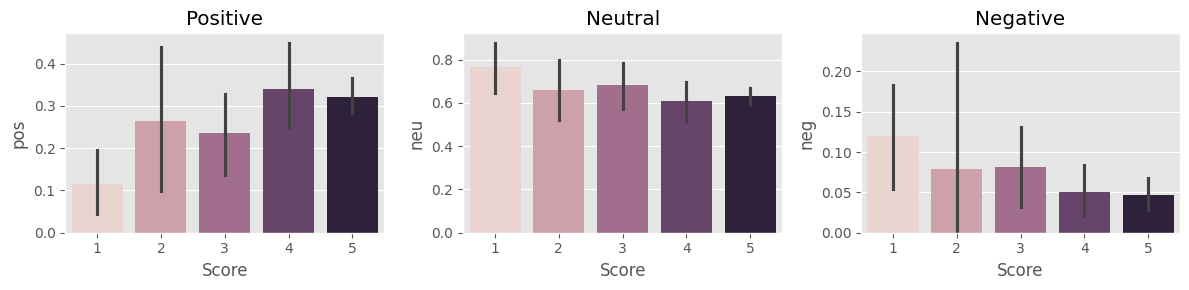

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], hue='Score', legend=False)
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], hue='Score', legend=False)
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], hue='Score', legend=False)
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

1. Positive Sentiment Chart:
The higher the score , the more positive the sentiment is as seen in score 4 and 5.
Score 2 shows a surprisingly high positive sentiment, but it has a lot of uncertainty (shown by the tall line).
Scores 1 and 3 have lower positive emotions.
1. Neutral Sentiment Chart:
Score 1 has the most neutral emotion—more than half of it is neutral.
Neutrality drops a little as scores go higher, meaning higher scores tend to be less neutral.
Scores 3, 4, and 5 show a more even split between neutral and positive or negative.
1. Negative Sentiment  Chart:
Negative emotion is strongest for low scores, especially for score 1 and 2.
As scores go up (like 4 and 5), the negativity goes down a lot.
This means higher scores are generally not associated with negative feelings.
In short:
Higher scores (4 and 5) are more positive and less negative.
Lower scores (1 and 2) are more negative and neutral.
Neutral feelings are common across all scores but highest for lower ones.

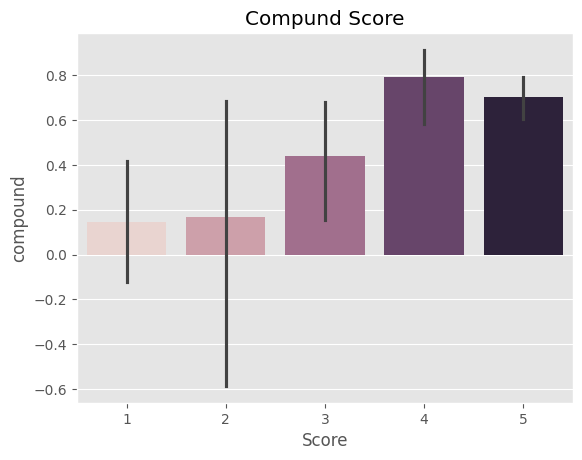

In [13]:
ax = sns.barplot(data=vaders, x='Score', y='compound', hue='Score', legend=False)
ax.set_title('Compund Score')
plt.show()

Scores 4 and 5 have the highest compound sentiment scores (closer to 0.8), indicating that these categories are associated with the most positive sentiment o.People feel the most positive about these things.
Score 2 has the largest error bar, which suggests that there's more uncertainty in the product associated with this score. We're not completely sure how people feel about this one.
The scores below 3 show lower compound scores, which could indicate neutral or slightly negative sentiment.The shows people have a more reserved feeling towards sad or disappointment based on their review


<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells. 

THis activity allowed me to experiment with sentiment analysis and understand how to use charts to read the analyzed data.with my preprocessing and basic data manipulation I was albe to arrive at the expected results. and explain what the chart meant. Most importantly I learnt that some scores by users might not be a total reflection of the conducted sentiment analysis 

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab5.ipynb** to the **Lab 5 – Sentiment Analysis (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection